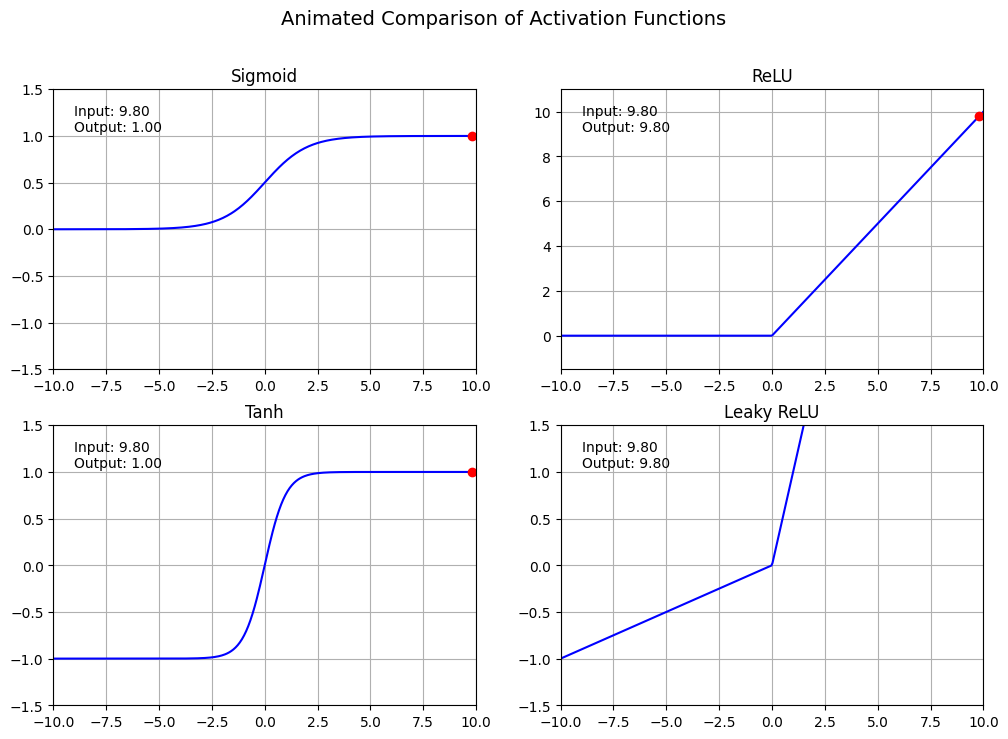

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def leaky_relu(x): return np.where(x > 0, x, 0.1 * x)

x_vals = np.linspace(-10, 10, 400)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

functions = [
    ("Sigmoid", sigmoid, axs[0, 0]),
    ("ReLU", relu, axs[0, 1]),
    ("Tanh", tanh, axs[1, 0]),
    ("Leaky ReLU", leaky_relu, axs[1, 1])
]

dots, texts = [], []

for name, func, ax in functions:
    ax.plot(x_vals, func(x_vals), color='blue')
    dot, = ax.plot([], [], 'ro')
    text = ax.text(0.05, 0.85, '', transform=ax.transAxes)
    dots.append(dot)
    texts.append(text)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1.5, 11 if name == "ReLU" else 1.5)
    ax.set_title(name)
    ax.grid(True)

fig.suptitle("Animated Comparison of Activation Functions", fontsize=14)

def init():
    for dot, text in zip(dots, texts):
        dot.set_data([], [])
        text.set_text('')
    return dots + texts

def animate(i):
    x = -10 + i * 0.2
    for (name, func, ax), dot, text in zip(functions, dots, texts):
        y = func(x)
        dot.set_data([x], [y])
        text.set_text(f'Input: {x:.2f}\nOutput: {y:.2f}')
    return dots + texts

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)
ani.save("activation_functions_comparison.gif", writer='pillow')
